In [ ]:
pip install eli5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from xgboost import XGBClassifier

import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv') #upload the dataset on the drive, mount drive, copy path of dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


<Axes: >

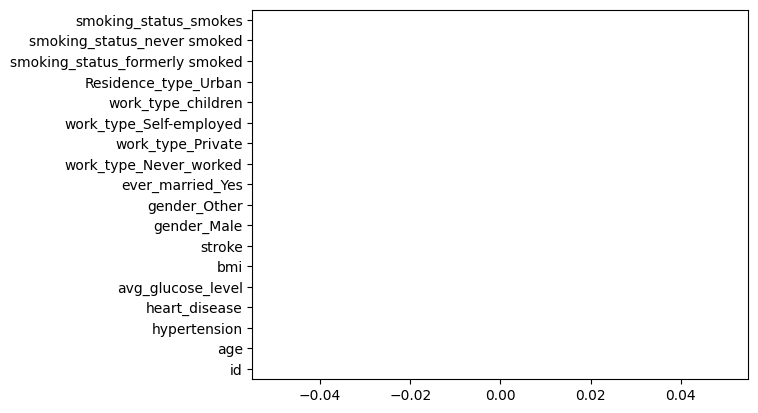

In [ ]:
# Printing the number of N/A values in eacg column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

In [ ]:
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,105.658317,27.329550,0.048728,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,21161.721625,22.633866,0.296607,0.226063,45.275290,9.470654,0.215320,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,67.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.000000,32.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.000000,97.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   id                              5110 non-null   int64
 1   age                             5110 non-null   int64
 2   hypertension                    5110 non-null   int64
 3   heart_disease                   5110 non-null   int64
 4   avg_glucose_level               5110 non-null   int64
 5   bmi                             5110 non-null   int64
 6   stroke                          5110 non-null   int64
 7   gender_Male                     5110 non-null   uint8
 8   gender_Other                    5110 non-null   uint8
 9   ever_married_Yes                5110 non-null   uint8
 10  work_type_Never_worked          5110 non-null   uint8
 11  work_type_Private               5110 non-null   uint8
 12  work_type_Self-employed         5110 non-null   uint8
 13  wor

In [ ]:
# Generating dummy attributes - one hot encoding format
missing_values = df[['age', 'avg_glucose_level', 'bmi']].isnull().sum()

# If there are missing values, you need to handle them (e.g., by filling with a specific value)
if missing_values.any():
    # Fill missing values with a specific value (you can choose a different strategy based on your data)
    df[['age', 'avg_glucose_level', 'bmi']] = df[['age', 'avg_glucose_level', 'bmi']].fillna(0)
df = pd.get_dummies(df, drop_first= True)
df['age'] = df['age'].astype(int)
df['avg_glucose_level'] = df['avg_glucose_level'].astype(int)
df['bmi'] = df['bmi'].astype(int)

In [ ]:
# The data frame after performing dummy attributes
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67,0,1,228,36,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61,0,0,202,0,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80,0,1,105,32,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49,0,0,171,34,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79,1,0,174,24,1,0,0,1,0,0,1,0,0,0,1,0


Text(0.5, 1.0, 'Stroke in people before SMOTE')

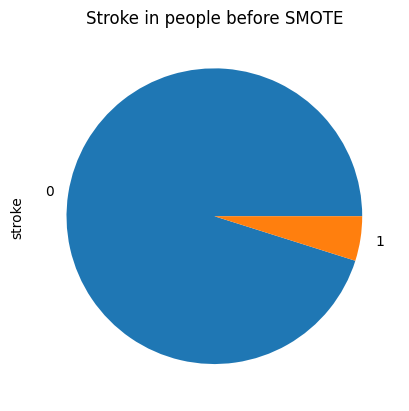

In [ ]:
df['stroke'].value_counts().plot(kind="pie")
plt.title('Stroke in people before SMOTE')

<Axes: title={'center': 'Stroke in people after SMOTE'}, ylabel='stroke'>

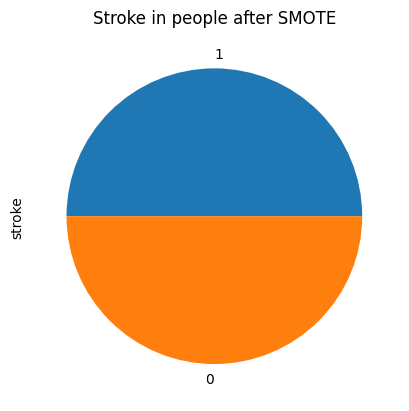

In [ ]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke'],axis=1)
y=df['stroke']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

plt.title('Stroke in people after SMOTE')
pd.Series(y_over).value_counts().plot(kind="pie")

In [ ]:
X_over = X_over.drop(['id'],axis=1)
X_over.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,1,0,0,1,1,0,0
1,61,0,0,202,0,0,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105,32,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
X_over = X_over.drop(['gender_Other'],axis=1)
X_over.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,0,1,0,0,1,1,0,0
1,61,0,0,202,0,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105,32,1,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,0,1,0,0,1,0,0,0,1,0


In [ ]:
print("Number of features in X:", X_over.shape[1])

Number of features in X: 15


In [ ]:
standard_scalar=StandardScaler()
normalized_data=standard_scalar.fit_transform(X_over)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(normalized_data,y_over,shuffle=True)

In [ ]:
mlp_cls=Sequential([
    Dense(units=512,activation='relu',input_dim=x_train.shape[1]),
    Dropout(0.1),
    Dense(units=256,activation='relu'),
    Dropout(0.1),
    Dense(units=128,activation='relu'),
    Dropout(0.1),
    Dense(units=64,activation='relu'),
    Dropout(0.1),
    Dense(units=1,activation='sigmoid')
])

In [ ]:
mlp_cls.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               8704      
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)               

In [ ]:
x2_train, x2_val, y2_train, y2_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)
erl_stpg=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [ ]:
mlp_cls.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mlp_cls.fit(x2_train,y2_train,epochs=100,batch_size=256,validation_data=(x2_val,y2_val),callbacks=[erl_stpg])

Epoch 1/100
23/23 [==============================] - 2s 26ms/step - loss: 0.5312 - accuracy: 0.7466 - val_loss: 0.4690 - val_accuracy: 0.7882
Epoch 2/100
23/23 [==============================] - 0s 18ms/step - loss: 0.4515 - accuracy: 0.7934 - val_loss: 0.4296 - val_accuracy: 0.8060
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 0.4183 - accuracy: 0.8136 - val_loss: 0.3962 - val_accuracy: 0.8108
Epoch 4/100
23/23 [==============================] - 0s 16ms/step - loss: 0.3998 - accuracy: 0.8165 - val_loss: 0.3798 - val_accuracy: 0.8348
Epoch 5/100
23/23 [==============================] - 1s 26ms/step - loss: 0.3574 - accuracy: 0.8400 - val_loss: 0.3512 - val_accuracy: 0.8444
Epoch 6/100
23/23 [==============================] - 1s 27ms/step - loss: 0.3346 - accuracy: 0.8580 - val_loss: 0.3207 - val_accuracy: 0.8677
Epoch 7/100
23/23 [==============================] - 1s 26ms/step - loss: 0.3191 - accuracy: 0.8603 - val_loss: 0.3068 - val_accuracy: 0.8821
Epoch 

In [ ]:
xgb_cls=XGBClassifier()

xgb_prm_grd = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
}

xgb_grd_srch = GridSearchCV(estimator=xgb_cls, param_grid=xgb_prm_grd, scoring='neg_log_loss', cv=5)
xgb_grd_srch.fit(x_train, y_train)

xgb_bst_prms = xgb_grd_srch.best_params_
print("Best Hyperparameters:", xgb_bst_prms)
xgb_cls_bst=xgb_grd_srch.best_estimator_

Best Hyperparameters: {'max_depth': 7, 'n_estimators': 200}


In [ ]:
logistic_regression_classifer=LogisticRegression()
logistic_regression_classifer.fit(x_train,y_train)

LogisticRegression()

In [ ]:
knn_classifier=KNeighborsClassifier()

knn_classifier_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn_classifier_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_classifier_param_grid, scoring='neg_log_loss', cv=5)
knn_classifier_grid_search.fit(x_train,y_train)

knn_classifier_best_params = knn_classifier_grid_search.best_params_
print("Best Hyperparameters:", knn_classifier_best_params)
knn_classifier_best=knn_classifier_grid_search.best_estimator_

Best Hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}


In [ ]:
decision_tree_classifer=DecisionTreeClassifier()

decision_tree_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

decision_tree_grid_search = GridSearchCV(estimator=decision_tree_classifer, param_grid=decision_tree_param_grid, scoring='neg_log_loss', cv=5)
decision_tree_grid_search.fit(x_train,y_train)

decision_tree_best_params = decision_tree_grid_search.best_params_
print("Best Hyperparameters:", decision_tree_best_params)
decision_tree_classifier_best=decision_tree_grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
random_forest_classifer=RandomForestClassifier()

random_forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_forest_grid_search = GridSearchCV(estimator=random_forest_classifer, param_grid=random_forest_param_grid, scoring='neg_log_loss', cv=5)
random_forest_grid_search.fit(x_train,y_train)

random_forest_best_params = random_forest_grid_search.best_params_
print("Best Hyperparameters:", random_forest_best_params)
# Assuming X is your input data



Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
random_forest_classifier_best=random_forest_grid_search.best_estimator_

In [ ]:
mlp_prd=mlp_cls.predict(x_test)
mlp_prd=mlp_prd.round()

76/76 [==============================] - 0s 3ms/step


In [ ]:
xgb_crs_val_scr=cross_val_score(xgb_cls_bst,x_train,y_train,scoring='accuracy')
xgb_crs_val_scr

array([0.96504455, 0.97942387, 0.96844993, 0.97256516, 0.97530864])

In [ ]:
xgb_prd=xgb_cls_bst.predict(x_test)

In [ ]:
random_forest_cross_validation_score=cross_val_score(random_forest_classifier_best,x_train,y_train,scoring='accuracy')
random_forest_cross_validation_score

array([0.98560658, 0.98765432, 0.98422497, 0.98628258, 0.98834019])

In [ ]:
random_forest_prediction=random_forest_classifier_best.predict(x_test)

In [ ]:
decision_tree_cross_validation_score=cross_val_score(decision_tree_classifier_best,x_train,y_train,scoring='accuracy')
decision_tree_cross_validation_score

array([0.87525703, 0.87722908, 0.8600823 , 0.86831276, 0.84910837])

In [ ]:
decision_tree_prediction=decision_tree_classifier_best.predict(x_test)

In [ ]:
logistic_regression_cross_validation_score=cross_val_score(logistic_regression_classifer,x_train,y_train,scoring='accuracy')
logistic_regression_cross_validation_score

array([0.7861549 , 0.76337449, 0.75514403, 0.76886145, 0.79218107])

In [ ]:
logistic_regression_prediction=logistic_regression_classifer.predict(x_test)

In [ ]:
knn_cross_validation_score=cross_val_score(knn_classifier_best,x_train,y_train,scoring='accuracy')
knn_cross_validation_score

array([0.90198766, 0.88820302, 0.88820302, 0.90260631, 0.90397805])

In [ ]:
knn_prediction=knn_classifier_best.predict(x_test)

76/76 [==============================] - 0s 4ms/step - loss: 0.1342 - accuracy: 0.9634


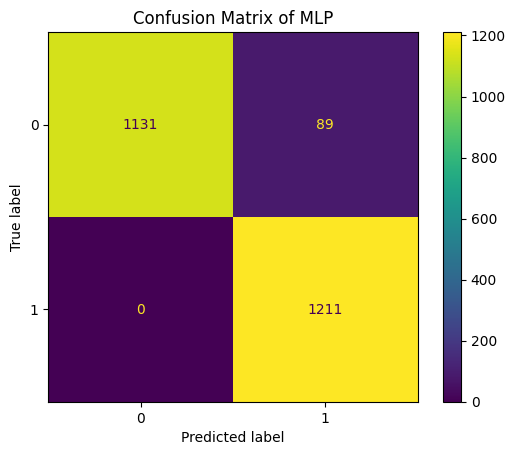

Accuracy of MLP:  0.9633895516248457
Precision of MLP:  0.9315384615384615
Recall of MLP: 1.0
Specificity of MLP:  0.9270491803278689


In [ ]:
mlp_tst_ls,mlp_accr=mlp_cls.evaluate(x_test,y_test)

mlp_cls_cnfsn_mtrx=confusion_matrix(y_test,mlp_prd)
ConfusionMatrixDisplay.from_predictions(y_test,mlp_prd)
plt.title('Confusion Matrix of MLP')
plt.show()

mlp_acc=accuracy_score(y_test,mlp_prd)
mlp_prcsn=precision_score(y_test,mlp_prd)
mlp_rcl=recall_score(y_test,mlp_prd)
mlp_spc=mlp_cls_cnfsn_mtrx[0][0]/(mlp_cls_cnfsn_mtrx[0][0]+mlp_cls_cnfsn_mtrx[0][1])

print("Accuracy of MLP: ",mlp_acc)
print("Precision of MLP: ",mlp_prcsn)
print("Recall of MLP: {}".format(mlp_rcl))
print("Specificity of MLP: ",mlp_spc)

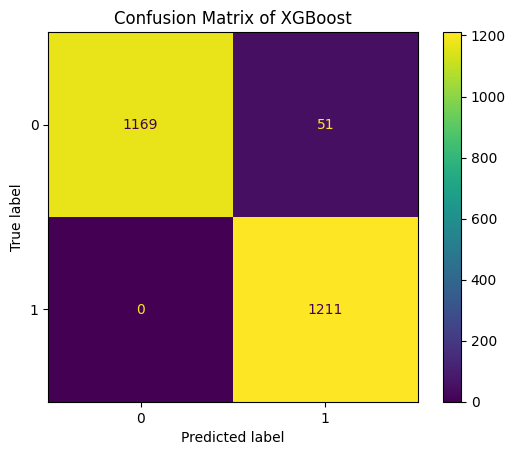

Accuracy of XGBoost:  0.9790209790209791
Precision of XGBoost:  0.9595879556259905
Recall of XGBoost: 1.0
Specificity of XGBoost:  0.9581967213114754


In [ ]:
xgb_cls_cnfsn_mtrx=confusion_matrix(y_test,xgb_prd)
ConfusionMatrixDisplay.from_predictions(y_test,xgb_prd)
plt.title('Confusion Matrix of XGBoost')
plt.show()

xgb_acc=accuracy_score(y_test,xgb_prd)
xgb_prcsn=precision_score(y_test,xgb_prd)
xgb_rcl=recall_score(y_test,xgb_prd)
xgb_spc=xgb_cls_cnfsn_mtrx[0][0]/(xgb_cls_cnfsn_mtrx[0][0]+xgb_cls_cnfsn_mtrx[0][1])

print("Accuracy of XGBoost: ",xgb_acc)
print("Precision of XGBoost: ",xgb_prcsn)
print("Recall of XGBoost: {}".format(xgb_rcl))
print("Specificity of XGBoost: ",xgb_spc)

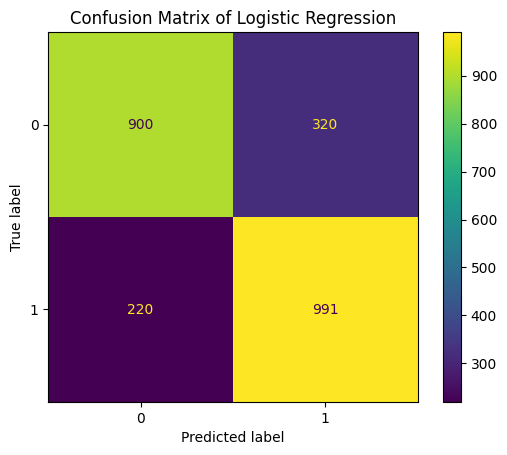

Accuracy of Logistic Regression:  0.7778691896338955
Precision of Logistic Regression:  0.7559115179252479
Recall of Logistic Regression:  0.8183319570602807
Specificity of Logistic Regression:  0.7377049180327869


In [ ]:
logistic_regression_confusion_matrix=confusion_matrix(y_test,logistic_regression_prediction)
ConfusionMatrixDisplay.from_predictions(y_test,logistic_regression_prediction)
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

logistic_regression_accuracy=accuracy_score(y_test,logistic_regression_prediction)
logistic_regression_precision=precision_score(y_test,logistic_regression_prediction)
logistic_regression_recall=recall_score(y_test,logistic_regression_prediction)
logistic_regression_specificity=logistic_regression_confusion_matrix[0][0]/(logistic_regression_confusion_matrix[0][0]+logistic_regression_confusion_matrix[0][1])

print("Accuracy of Logistic Regression: ",logistic_regression_accuracy)
print("Precision of Logistic Regression: ",logistic_regression_precision)
print("Recall of Logistic Regression: ",logistic_regression_recall)
print("Specificity of Logistic Regression: ",logistic_regression_specificity)

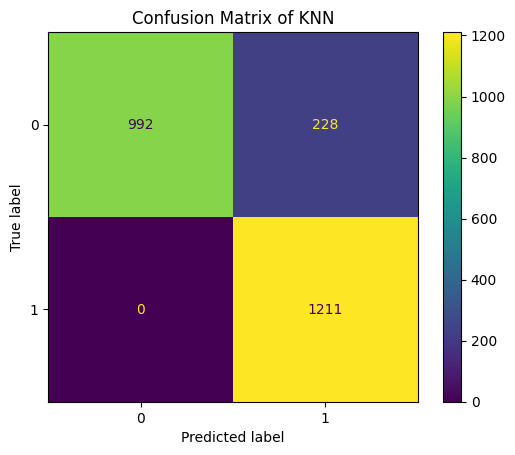

Accuracy of KNN:  0.9062114356232003
Precision of KNN:  0.8415566365531619
Recall of KNN:  1.0
Specificity of KNN:  0.8131147540983606


In [ ]:
knn_confusion_matrix=confusion_matrix(y_test,knn_prediction)
ConfusionMatrixDisplay.from_predictions(y_test,knn_prediction)
plt.title('Confusion Matrix of KNN')
plt.show()

knn_accuracy=accuracy_score(y_test,knn_prediction)
knn_precision=precision_score(y_test,knn_prediction)
knn_recall=recall_score(y_test,knn_prediction)
knn_specificity=knn_confusion_matrix[0][0]/(knn_confusion_matrix[0][0]+knn_confusion_matrix[0][1])

print("Accuracy of KNN: ",knn_accuracy)
print("Precision of KNN: ",knn_precision)
print("Recall of KNN: ",knn_recall)
print("Specificity of KNN: ",knn_specificity)

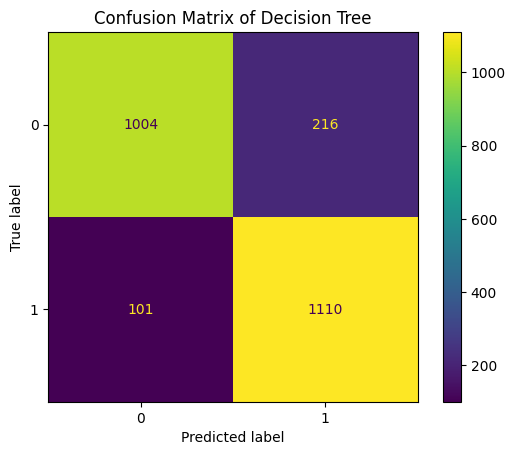

Accuracy of Decision Tree:  0.869600987248046
Precision of Decision Tree:  0.8371040723981901
Recall of Decision Tree:  0.916597853014038
Specificity of Decsion Tree:  0.8229508196721311


In [ ]:
decision_tree_confusion_matrix=confusion_matrix(y_test,decision_tree_prediction)
ConfusionMatrixDisplay.from_predictions(y_test,decision_tree_prediction)
plt.title('Confusion Matrix of Decision Tree')
plt.show()

decision_tree_accuracy=accuracy_score(y_test,decision_tree_prediction)
decision_tree_precision=precision_score(y_test,decision_tree_prediction)
decision_tree_recall=recall_score(y_test,decision_tree_prediction)
decision_tree_specificity=decision_tree_confusion_matrix[0][0]/(decision_tree_confusion_matrix[0][0]+decision_tree_confusion_matrix[0][1])

print("Accuracy of Decision Tree: ",decision_tree_accuracy)
print("Precision of Decision Tree: ",decision_tree_precision)
print("Recall of Decision Tree: ",decision_tree_recall)
print("Specificity of Decsion Tree: ",decision_tree_specificity)

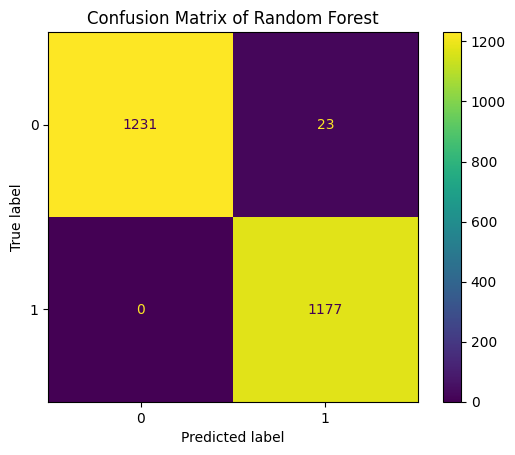

Accuracy of Random Forest:  0.9905388728918141
Precision of Random Forest:  0.9808333333333333
Recall of Random Forest:  1.0
Specificity of Random Forest:  0.981658692185008


In [ ]:
random_forest_confusion_matrix=confusion_matrix(y_test,random_forest_prediction)
ConfusionMatrixDisplay.from_predictions(y_test,random_forest_prediction)
plt.title('Confusion Matrix of Random Forest')
plt.show()

random_forest_accuracy=accuracy_score(y_test,random_forest_prediction)
random_forest_precision=precision_score(y_test,random_forest_prediction)
random_forest_recall=recall_score(y_test,random_forest_prediction)
random_forest_specificity=random_forest_confusion_matrix[0][0]/(random_forest_confusion_matrix[0][0]+random_forest_confusion_matrix[0][1])

print("Accuracy of Random Forest: ",random_forest_accuracy)
print("Precision of Random Forest: ",random_forest_precision)
print("Recall of Random Forest: ",random_forest_recall)
print("Specificity of Random Forest: ",random_forest_specificity)

In [ ]:
xgb_perm=PermutationImportance(xgb_cls_bst).fit(x_test,y_test)
show_weights(xgb_perm,feature_names=X_over.columns.tolist())

Weight,Feature
0.3242 ± 0.0114,age
0.2753 ± 0.0148,avg_glucose_level
0.2371 ± 0.0108,bmi
0.0197 ± 0.0047,smoking_status_never smoked
0.0186 ± 0.0034,hypertension
0.0092 ± 0.0035,ever_married_Yes
0.0086 ± 0.0028,heart_disease
0.0049 ± 0.0034,work_type_Private
0.0047 ± 0.0021,gender_Male
0.0044 ± 0.0016,smoking_status_smokes


In [ ]:
#prds = mlp_cls.predict(x_test)
#rnd_prds = np.round(prds)
#mlp_perm=PermutationImportance(mlp_cls, scoring='neg_log_loss').fit(x_test,y_test)
#show_weights(mlp_perm,feature_names=X_over.columns.tolist())

In [ ]:
#decision_tree_perm=PermutationImportance(decision_tree_classifer).fit(x_test,y_test)
#show_weights(decision_tree_perm,feature_names=X_over.columns.tolist())

In [ ]:
random_forest_perm=PermutationImportance(random_forest_classifier_best).fit(x_test,y_test)
show_weights(random_forest_perm,feature_names=X_over.columns.tolist())

Weight,Feature
0.3234 ± 0.0075,age
0.2644 ± 0.0106,avg_glucose_level
0.1871 ± 0.0053,bmi
0.0843 ± 0.0037,ever_married_Yes
0.0841 ± 0.0068,hypertension
0.0798 ± 0.0047,heart_disease
0.0666 ± 0.0048,smoking_status_never smoked
0.0578 ± 0.0046,gender_Male
0.0566 ± 0.0077,work_type_Private
0.0552 ± 0.0045,Residence_type_Urban


In [ ]:
logistic_regression_perm=PermutationImportance(logistic_regression_classifer).fit(x_test,y_test)
show_weights(logistic_regression_perm,feature_names=X_over.columns.tolist())

Weight,Feature
0.2535 ± 0.0186,age
0.0109 ± 0.0073,avg_glucose_level
0.0052 ± 0.0058,work_type_children
0.0035 ± 0.0025,bmi
0.0026 ± 0.0019,Residence_type_Urban
0.0017 ± 0.0010,smoking_status_never smoked
0.0016 ± 0.0038,work_type_Private
0.0014 ± 0.0011,work_type_Self-employed
0.0012 ± 0.0028,gender_Male
0.0005 ± 0.0013,work_type_Never_worked


In [ ]:
#knn_perm=PermutationImportance(knn_classifier).fit(x_test,y_test)
#show_weights(knn_perm,feature_names=X_over.columns.tolist())

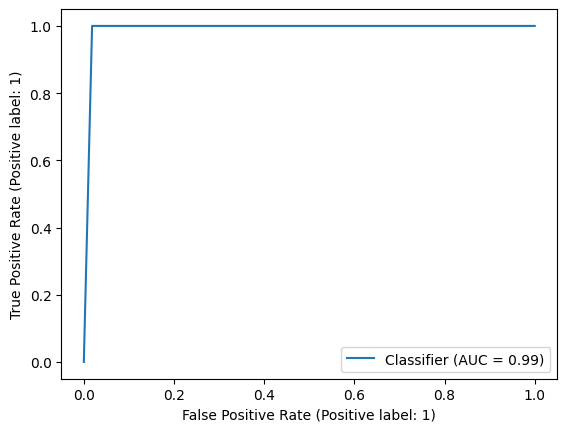

In [ ]:
RocCurveDisplay.from_predictions(y_test,random_forest_prediction)

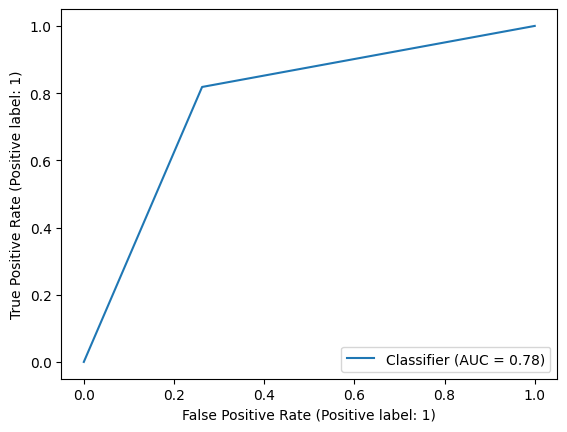

In [ ]:
RocCurveDisplay.from_predictions(y_test,logistic_regression_prediction)

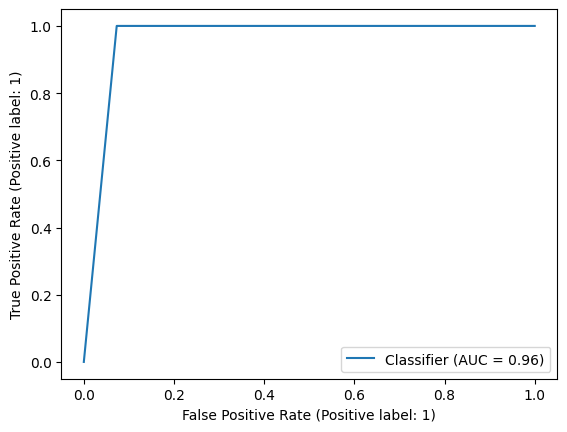

In [ ]:
RocCurveDisplay.from_predictions(y_test,mlp_prd)

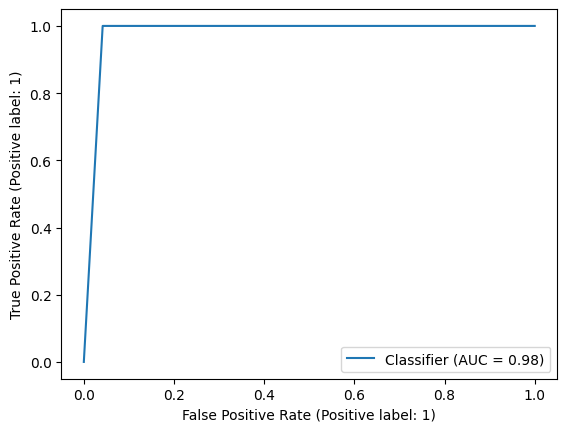

In [ ]:
RocCurveDisplay.from_predictions(y_test,xgb_prd)

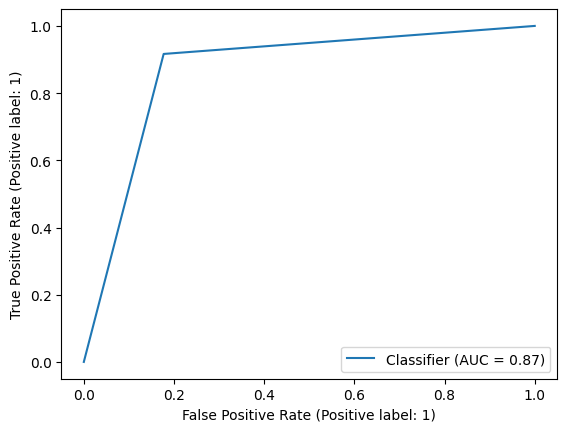

In [ ]:
RocCurveDisplay.from_predictions(y_test,decision_tree_prediction)

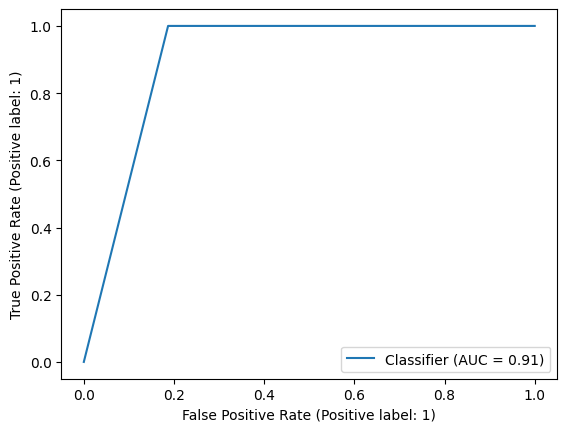

In [ ]:
RocCurveDisplay.from_predictions(y_test,knn_prediction)

In [ ]:
joblib.dump(random_forest_classifier_best, '/content/drive/MyDrive/random_forest_model.joblib')

['/content/drive/MyDrive/random_forest_model.joblib']

In [ ]:
X2_over = X_over.drop(['hypertension'],axis=1)
X2_over.head()

,age,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,1,228,36,1,0,1,0,1,0,0,1,1,0,0
1,61,0,202,0,0,0,1,0,0,1,0,0,0,1,0
2,80,1,105,32,1,0,1,0,1,0,0,0,0,1,0
3,49,0,171,34,0,0,1,0,1,0,0,1,0,0,1
4,79,0,174,24,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
standard_scalar2=StandardScaler()
normalized_data2=standard_scalar2.fit_transform(X2_over)

In [ ]:
x3_train,x3_test,y3_train,y3_test=train_test_split(normalized_data2,y_over,shuffle=True)

In [ ]:
xgb_prm_grd2 = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
}

xgb_grd_srch2 = GridSearchCV(estimator=xgb_cls, param_grid=xgb_prm_grd2, scoring='neg_log_loss', cv=5)
xgb_grd_srch2.fit(x3_train, y3_train)

xgb_bst_prms2 = xgb_grd_srch2.best_params_
print("Best Hyperparameters:", xgb_bst_prms2)
xgb_cls_bst2=xgb_grd_srch2.best_estimator_

Best Hyperparameters: {'max_depth': 7, 'n_estimators': 200}


In [ ]:
xgb_crs_val_scr2=cross_val_score(xgb_cls_bst2,x_train,y_train,scoring='accuracy')
xgb_crs_val_scr2

array([0.96504455, 0.97942387, 0.96844993, 0.97256516, 0.97530864])

In [ ]:
xgb_prd2=xgb_cls_bst2.predict(x3_test)

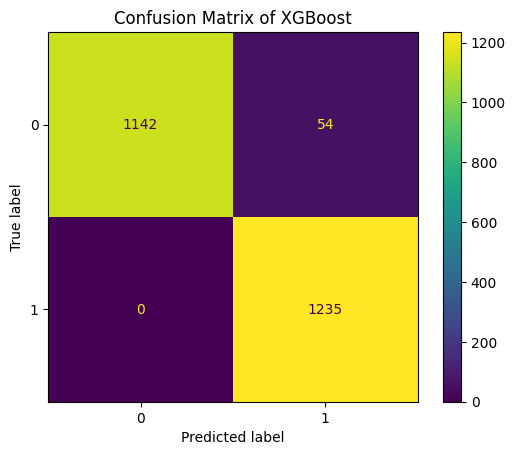

Accuracy of XGBoost:  0.9777869189633895
Precision of XGBoost:  0.9581070597362297
Recall of XGBoost: 1.0
Specificity of XGBoost:  0.9548494983277592


In [ ]:
xgb_cls_cnfsn_mtrx2=confusion_matrix(y3_test,xgb_prd2)
ConfusionMatrixDisplay.from_predictions(y3_test,xgb_prd2)
plt.title('Confusion Matrix of XGBoost')
plt.show()

xgb_acc2=accuracy_score(y3_test,xgb_prd2)
xgb_prcsn2=precision_score(y3_test,xgb_prd2)
xgb_rcl2=recall_score(y3_test,xgb_prd2)
xgb_spc2=xgb_cls_cnfsn_mtrx2[0][0]/(xgb_cls_cnfsn_mtrx2[0][0]+xgb_cls_cnfsn_mtrx2[0][1])

print("Accuracy of XGBoost: ",xgb_acc2)
print("Precision of XGBoost: ",xgb_prcsn2)
print("Recall of XGBoost: {}".format(xgb_rcl2))
print("Specificity of XGBoost: ",xgb_spc2)

In [ ]:
mlp_cls2=Sequential([
    Dense(units=512,activation='relu',input_dim=x3_train.shape[1]),
    Dropout(0.1),
    Dense(units=256,activation='relu'),
    Dropout(0.1),
    Dense(units=128,activation='relu'),
    Dropout(0.1),
    Dense(units=64,activation='relu'),
    Dropout(0.1),
    Dense(units=1,activation='sigmoid')
])

In [ ]:
x4_train, x4_val, y4_train, y4_val = train_test_split(x3_train, y3_train, test_size=0.2, shuffle=True)
erl_stpg=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [ ]:
mlp_cls2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mlp_cls2.fit(x4_train,y4_train,epochs=100,batch_size=256,validation_data=(x4_val,y4_val),callbacks=[erl_stpg])

Epoch 1/100
23/23 [==============================] - 3s 37ms/step - loss: 0.5261 - accuracy: 0.7416 - val_loss: 0.4626 - val_accuracy: 0.7923
Epoch 2/100
23/23 [==============================] - 0s 20ms/step - loss: 0.4452 - accuracy: 0.7886 - val_loss: 0.4315 - val_accuracy: 0.8033
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 0.4211 - accuracy: 0.8002 - val_loss: 0.4095 - val_accuracy: 0.8163
Epoch 4/100
23/23 [==============================] - 0s 20ms/step - loss: 0.3913 - accuracy: 0.8230 - val_loss: 0.3843 - val_accuracy: 0.8334
Epoch 5/100
23/23 [==============================] - 0s 17ms/step - loss: 0.3757 - accuracy: 0.8285 - val_loss: 0.3807 - val_accuracy: 0.8245
Epoch 6/100
23/23 [==============================] - 0s 19ms/step - loss: 0.3507 - accuracy: 0.8426 - val_loss: 0.3431 - val_accuracy: 0.8465
Epoch 7/100
23/23 [==============================] - 0s 19ms/step - loss: 0.3286 - accuracy: 0.8560 - val_loss: 0.3353 - val_accuracy: 0.8561
Epoch 

76/76 [==============================] - 0s 4ms/step - loss: 0.1261 - accuracy: 0.9667


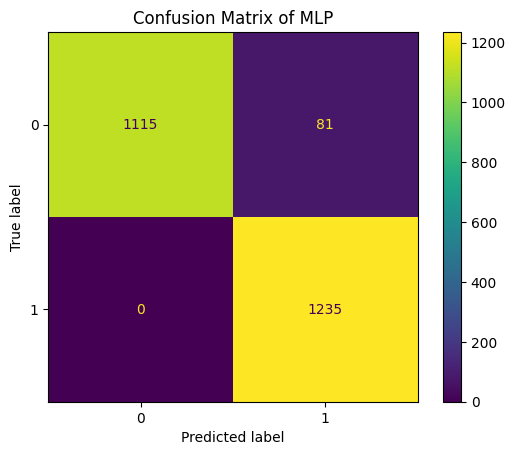

Accuracy of MLP:  0.9666803784450844
Precision of MLP:  0.9384498480243161
Recall of MLP: 1.0
Specificity of MLP:  0.9322742474916388


In [ ]:
mlp_prd2=mlp_cls2.predict(x3_test).round()
mlp_tst_ls2,mlp_accr2=mlp_cls2.evaluate(x3_test,y3_test)

mlp_cls_cnfsn_mtrx2=confusion_matrix(y3_test,mlp_prd2)
ConfusionMatrixDisplay.from_predictions(y3_test,mlp_prd2)
plt.title('Confusion Matrix of MLP')
plt.show()

mlp_acc2=accuracy_score(y3_test,mlp_prd2)
mlp_prcsn2=precision_score(y3_test,mlp_prd2)
mlp_rcl2=recall_score(y3_test,mlp_prd2)
mlp_spc2=mlp_cls_cnfsn_mtrx2[0][0]/(mlp_cls_cnfsn_mtrx2[0][0]+mlp_cls_cnfsn_mtrx2[0][1])

print("Accuracy of MLP: ",mlp_acc2)
print("Precision of MLP: ",mlp_prcsn2)
print("Recall of MLP: {}".format(mlp_rcl2))
print("Specificity of MLP: ",mlp_spc2)